## Проект по прогнозирования рисков сердечно-сосудистых заболеваний с помощью алгоритмов машинного обучения

In [ ]:
# Загружаем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Загружаем и исследуем данные для обучения моделей
df_train = pd.read_csv('data/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [16]:
df_train.describe()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,173205.225094,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,0.000000,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,149999.750000,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,299999.500000,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,449999.250000,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,599999.000000,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


In [ ]:
# Проверяем тренировачные данные на наличие пропусков в данных
df_train.isnull().sum().sum()

0

In [ ]:
# Удаляем неинформативный столбец "ID"
df_train_cut = pd.DataFrame(df_train.drop('ID', axis = 1))

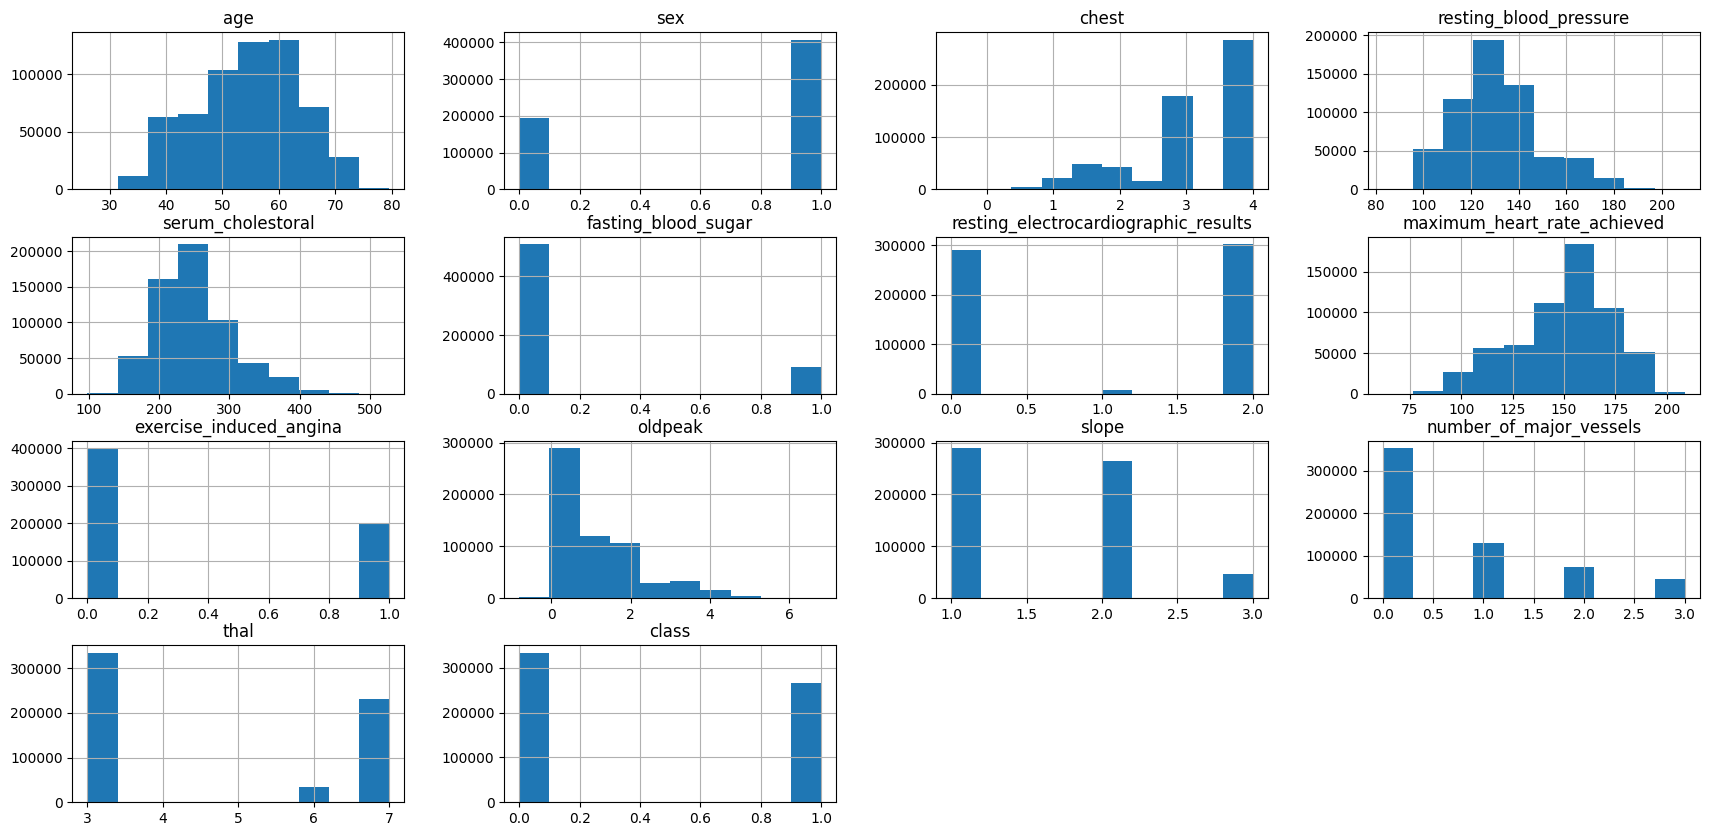

In [7]:
# Смотрим на распределения тренировачных данных
df_train_cut.hist(figsize=(21, 10));

In [8]:
# В условиях задачи прописано, что показатель Chest_bin (боль в груди) варьируется  от 1 до 4. В данных мы видим значения меньше 1.
# Определим количество таких значений
mask = df_train_cut['chest'] < 1 
df_train_cut[mask].shape[0]

10392

In [ ]:
# Удалим строки со значениями Chest_bin меньше 1
df_train_cut.drop(df_train_cut[mask].index, inplace=True)

In [10]:
# Проверим успешно ли удалилсь нужные строки
df_train_cut.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000,589608.000000
mean,54.444573,0.678812,3.212281,131.353423,249.630447,0.150827,1.021625,149.517931,0.336834,1.055291,1.597631,0.684828,4.720777,0.448459
std,9.081746,0.466933,0.902789,17.848790,51.697144,0.357881,0.994160,23.081713,0.472628,1.146073,0.629735,0.952072,1.936056,0.497337
min,26.061695,0.000000,1.000019,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,48.103905,0.000000,3.000000,119.930207,216.512633,0.000000,0.000000,135.623332,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.154679,1.000000,3.000000,129.731662,244.266202,0.000000,2.000000,153.166667,0.000000,0.818534,2.000000,0.000000,3.000000,0.000000
75%,60.671902,1.000000,4.000000,139.922644,274.372142,0.000000,2.000000,165.121941,1.000000,1.677361,2.000000,1.000000,7.000000,1.000000
max,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


Проверим данные на наличие мультиколлинеарности с помощью матрицы корреляций

In [ ]:
# Рассчитаем матрицу корреляций
correlation_matrix = df_train_cut.corr()

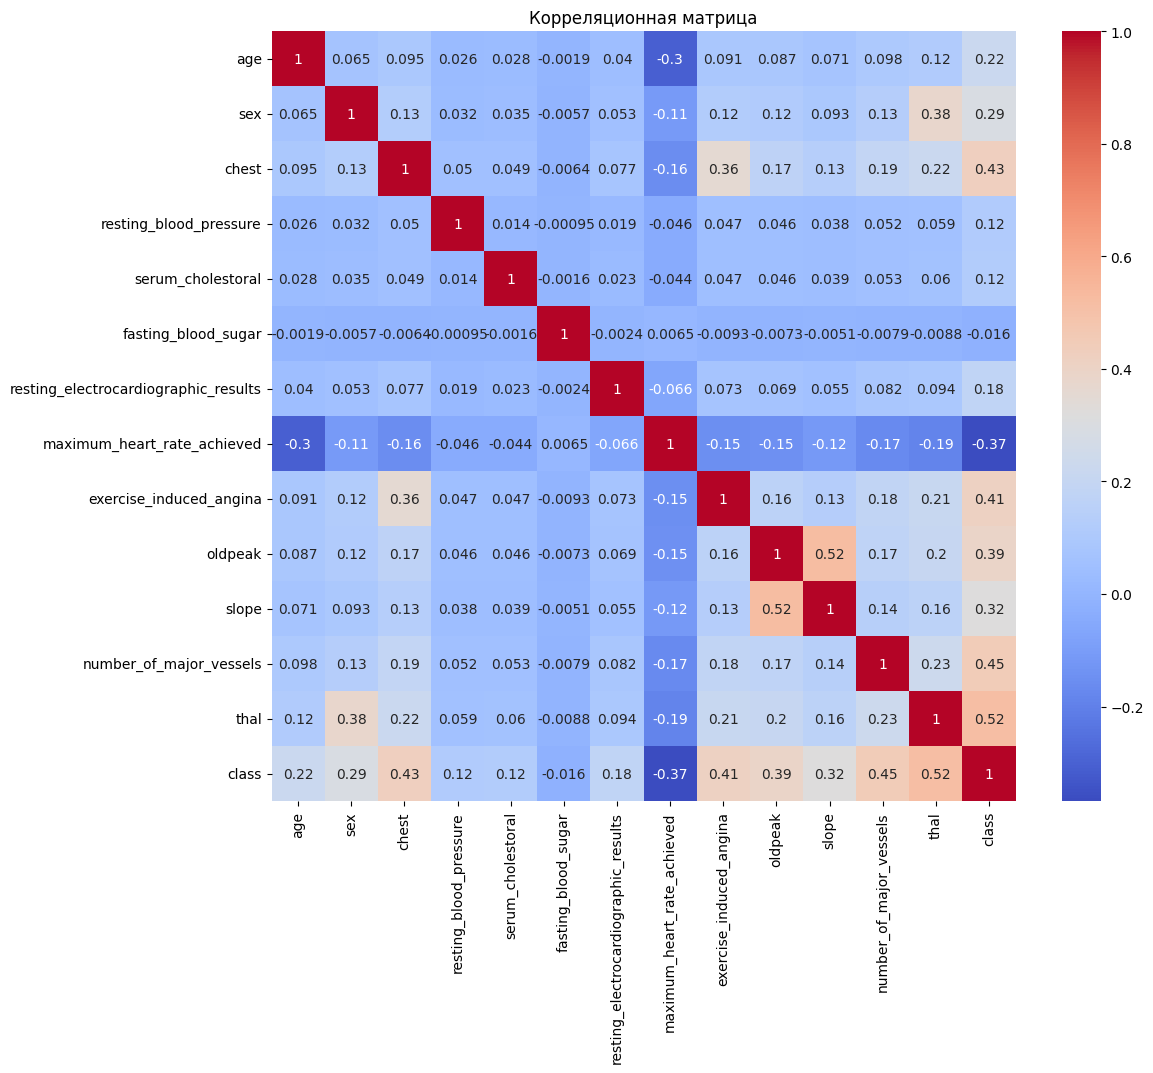

In [ ]:
# Визуализируем матрицу корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Значения коэффициентов корреляции для рассматриваемых признаков не приближаются к 1, мультиколинеарности для данных не наблюдаем, поэтому мы не будем удалять признаки для дальнейшего анализа.
Самый большой коэффициент корреляции обнаруживается между признаками "депрессия ST-сегмента (oldpeak)" и "наклон пикового сегмента ST при физической нагрузке (slope)" (0.52), а также между предиктором и "thal" (0.52). 

Посмотрим на распределения количественных признаков с помощью графиков boxplot, определим наличие выбросов

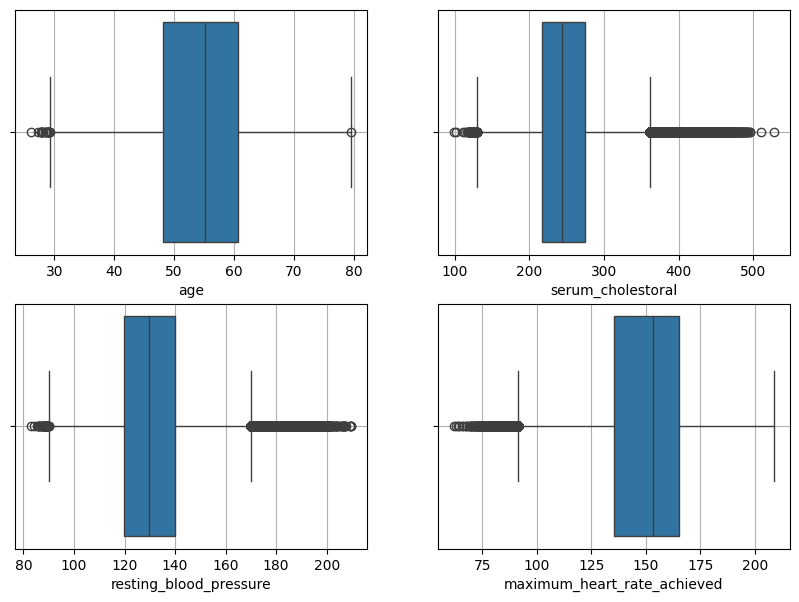

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
sns.boxplot(
    data=df_train_cut['age'],
    orient='h',
    width=0.9,
    ax= axes[0][0]
)
axes[0][0].set_xlabel('age');
axes[0][0].set_ylabel('');
axes[0][0].grid()

sns.boxplot(
    data=df_train_cut['resting_blood_pressure'],
    orient='h',
    width=0.9,
    ax= axes[1][0]
)
axes[1][0].set_xlabel('resting_blood_pressure');
axes[1][0].set_ylabel('');
axes[1][0].grid()

sns.boxplot(
    data=df_train_cut['serum_cholestoral'],
    orient='h',
    width=0.9,
    ax= axes[0][1]
)
axes[0][1].set_xlabel('serum_cholestoral');
axes[0][1].set_ylabel('');
axes[0][1].grid()

sns.boxplot(
    data=df_train_cut['maximum_heart_rate_achieved'],
    orient='h',
    width=0.9,
    ax= axes[1][1]
)
axes[1][1].set_xlabel('maximum_heart_rate_achieved');
axes[1][1].set_ylabel('');
axes[1][1].grid()

На графиках видно, что очень много значений не входит в 75% выборки. В большинстве, это случаи превышения показателей от предполагаемой нормы. Возможно именно эти показатели будут вносить наибольший вклад в постановку диагноза, удалять их из датасета не будем.

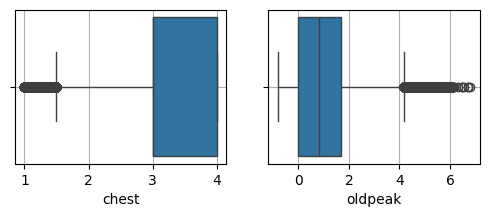

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))
sns.boxplot(
    data=df_train_cut['chest'],
    orient='h',
    width=0.9,
    ax= axes[0]
)
axes[0].set_xlabel('chest');
axes[0].set_ylabel('');
axes[0].grid()

sns.boxplot(
    data=df_train_cut['oldpeak'],
    orient='h',
    width=0.9,
    ax= axes[1]
)
axes[1].set_xlabel('oldpeak');
axes[1].set_ylabel('');
axes[1].grid()


Разделение выборки на тренировочную и валидационную. Стандартизация данных.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = pd.DataFrame(df_train_cut.drop('class', axis = 1))
y = df_train_cut['class']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
# Стандартизуем количественные признаки с помощью StandartScaler
st = StandardScaler()
columns_to_scale = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak', 'chest']
X_train[columns_to_scale] = st.fit_transform(X_train[columns_to_scale])
X_val[columns_to_scale] = st.transform(X_val[columns_to_scale])

Логистическая регрессия

In [ ]:
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [87]:
cv = model_selection.StratifiedKFold(n_splits=5)

In [91]:
# С помощью GridSearch подберем гиперпараметры для модели Логистической регрессии
params = {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
        }
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42), 
    param_grid=params, 
    cv=cv, 
    scoring='accuracy',
    n_jobs = -1
)  
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

c:\Users\alina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\alina\AppData\Local\Programs\Python\Python39\lib\site-packages\skl

{'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Модель Логистической регрессии с лучшими гиперпараметрами
log_reg = linear_model.LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
y_val_pred = log_reg.predict(X_val)

In [93]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    227635
           1       0.87      0.86      0.86    185090

    accuracy                           0.88    412725
   macro avg       0.88      0.88      0.88    412725
weighted avg       0.88      0.88      0.88    412725

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     97558
           1       0.87      0.86      0.87     79325

    accuracy                           0.88    176883
   macro avg       0.88      0.88      0.88    176883
weighted avg       0.88      0.88      0.88    176883



Случайный лес

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Подберем гиперпараметры для модели Случайного леса
param = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(
    n_estimators=100, 
    random_state=42 
), 
    param_grid=param, 
    cv=cv, 
    scoring='accuracy',
    n_jobs = -1
)  
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 11}


In [97]:
# Обучение модели Случайного леса с лучшими гиперпараметрами
Rfc_bp = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 15, 
    max_features = 4, 
    min_samples_leaf = 11,
    random_state = 42 
)
Rfc_bp.fit(X_train, y_train)
y_train_pred = Rfc_bp.predict(X_train)
y_val_pred = Rfc_bp.predict(X_val)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92    227635
           1       0.91      0.90      0.91    185090

    accuracy                           0.92    412725
   macro avg       0.92      0.91      0.92    412725
weighted avg       0.92      0.92      0.92    412725

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     97558
           1       0.89      0.88      0.89     79325

    accuracy                           0.90    176883
   macro avg       0.90      0.90      0.90    176883
weighted avg       0.90      0.90      0.90    176883



Нейронная сеть

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

We're using TF 2.10.0
We are using Keras 2.10.0


In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

In [110]:
clear_session()

In [111]:
# Архитектура сети
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13)) # первый скрытый слой
model.add(Dense(14, activation='relu')) # второй скрытый слой
model.add(Dense(14, activation='relu')) # третий скрытый слой
model.add(Dense(1, activation='sigmoid')) # выходной слой

In [112]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 14)                196       
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Компиляция нейронной сети
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
)

In [114]:
# Обучение нейронной сети
history = model.fit(
                    X_train, 
                    y_train,
                    batch_size=10,  
                    epochs=10,  
                    validation_data=(X_val, y_val)
                    )

Epoch 1/10
41273/41273 [==============================] - 61s 1ms/step - loss: 0.2759 - accuracy: 0.8848 - val_loss: 0.2624 - val_accuracy: 0.8919
Epoch 2/10
41273/41273 [==============================] - 60s 1ms/step - loss: 0.2605 - accuracy: 0.8919 - val_loss: 0.2574 - val_accuracy: 0.8940
Epoch 3/10
41273/41273 [==============================] - 61s 1ms/step - loss: 0.2558 - accuracy: 0.8938 - val_loss: 0.2562 - val_accuracy: 0.8942
Epoch 4/10
41273/41273 [==============================] - 59s 1ms/step - loss: 0.2538 - accuracy: 0.8950 - val_loss: 0.2552 - val_accuracy: 0.8953
Epoch 5/10
41273/41273 [==============================] - 60s 1ms/step - loss: 0.2527 - accuracy: 0.8956 - val_loss: 0.2555 - val_accuracy: 0.8947
Epoch 6/10
41273/41273 [==============================] - 60s 1ms/step - loss: 0.2518 - accuracy: 0.8957 - val_loss: 0.2515 - val_accuracy: 0.8963
Epoch 7/10
41273/41273 [==============================] - 61s 1ms/step - loss: 0.2511 - accuracy: 0.8960 - val_loss: 0

In [115]:
scores = model.evaluate(X_val, y_val)
print('Test Accuracy: ', scores[1]*100)

5528/5528 [==============================] - 6s 1ms/step - loss: 0.2492 - accuracy: 0.8971
Test Accuracy:  89.71297144889832


Графики обучения

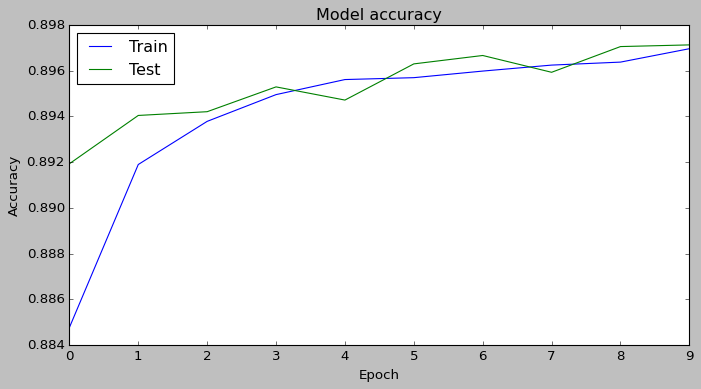

In [116]:
plt.style.use(['classic'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

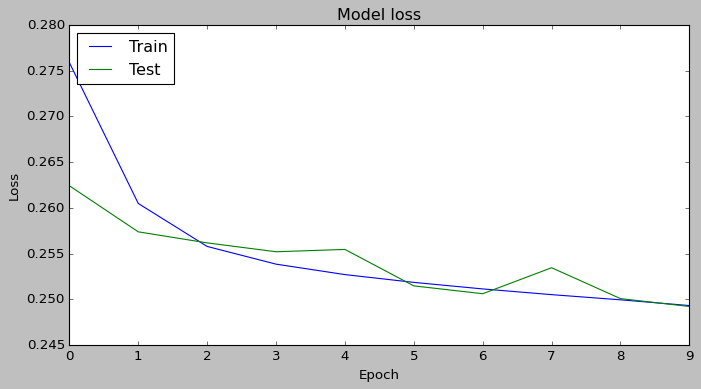

In [117]:
plt.style.use(['classic'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [121]:
table = pd.DataFrame({'Classifier': ['Logistic Regression', 'RandomForest', 'NN'], 
                      'Accuracy (Train/Test)': ['88/88', '92/90', '89/89']})
print(table)

            Classifier Accuracy (Train/Test)
0  Logistic Regression                 88/88
1         RandomForest                 92/90
2                   NN                 89/89


Наилучшие результаты для метрики качества - accuracy, получили для модели RandomForest Clasifier

Предсказание на тестовых данных 
Прогнозирования развития сердечно-сосудистых заболеваний на тестовых данных проведем с помощью модели нейронных сетей

In [40]:
# Загружаем тестовые данные
df_test = pd.read_csv('data/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

Обрабатываем тестовые данные также как и тренировочные:

In [41]:
# Проверяем на наличие пропущенных значений
df_test.isnull().sum().sum()

0

In [ ]:
# Удаляем столбец "ID"
df_test_cut = pd.DataFrame(df_test.drop('ID', axis = 1))

In [43]:
# Смотрим количество измерений, где признак chest меньше 1
mask = df_test_cut['chest'] < 1 
df_test_cut[mask].shape[0]

6953

In [44]:
X_test = df_test_cut.copy()

In [ ]:
# Удаляем строки в которых признак chest меньше единицы
df_test_cut.drop(df_test_cut[mask].index, inplace=True)

In [ ]:
# Стандартизируем количественные данные
X_test[columns_to_scale] = st.transform(X_test[columns_to_scale])

In [119]:
# Выполняем предсказание для тестовых данных с помощью обученной модели
X_test['class_pred'] = (model.predict(X_test) > 0.5).astype("int32")

12500/12500 [==============================] - 11s 872us/step


In [120]:
X_test.head(10)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class_pred
0,-0.051838,1,0.871357,0.313662,-0.247772,0,2,-0.240788,1,-0.299358,1,2,7,1
1,-0.530067,1,0.871357,-0.522333,-0.446496,0,2,-1.616223,1,-0.920475,1,1,7,1
2,-1.927573,1,-2.119744,-0.210661,1.961999,0,0,1.231876,0,-0.647014,1,0,7,0
3,0.049652,1,-0.236838,-0.362484,0.013606,0,0,0.158531,0,-0.651207,1,1,7,0
4,1.826530,0,-1.625436,-0.584099,-0.748619,0,0,0.652385,0,-0.028349,1,1,3,0
5,-0.078037,1,0.871357,0.270393,-0.035253,0,0,-0.427055,1,2.032366,2,0,3,1
6,0.115309,1,0.871357,1.667360,0.525567,0,2,-0.646505,1,-0.134281,2,0,3,1
7,-1.905008,0,-0.236838,-1.689515,0.112824,1,2,0.467020,0,0.673874,1,0,3,0
8,-0.028239,1,0.871357,-0.747504,0.705579,0,0,-0.417352,1,1.599500,1,1,3,1
9,1.445305,0,-1.163465,-1.186665,-0.072543,0,0,-1.770796,1,-0.920475,1,2,3,0
